In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels
import sklearn

In [2]:
PATH = 'AAPL.csv'

In [3]:
dataset = pd.read_csv(PATH)
df = dataset.copy()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
start_date = df.index.min()
end_date = df.index.max()
new_index = pd.date_range(start='1981-04-02', end='2022-06-02', freq='MS')
df = df.reindex(new_index, method='nearest')

df = df.dropna()
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
df.index

DatetimeIndex(['1981-05-01', '1981-06-01', '1981-07-01', '1981-08-01',
               '1981-09-01', '1981-10-01', '1981-11-01', '1981-12-01',
               '1982-01-01', '1982-02-01',
               ...
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01'],
              dtype='datetime64[ns]', length=494, freq='MS')

In [5]:

series = df['Close'].copy()
series.index

DatetimeIndex(['1981-05-01', '1981-06-01', '1981-07-01', '1981-08-01',
               '1981-09-01', '1981-10-01', '1981-11-01', '1981-12-01',
               '1982-01-01', '1982-02-01',
               ...
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01'],
              dtype='datetime64[ns]', length=494, freq='MS')

<Axes: ylabel='Frequency'>

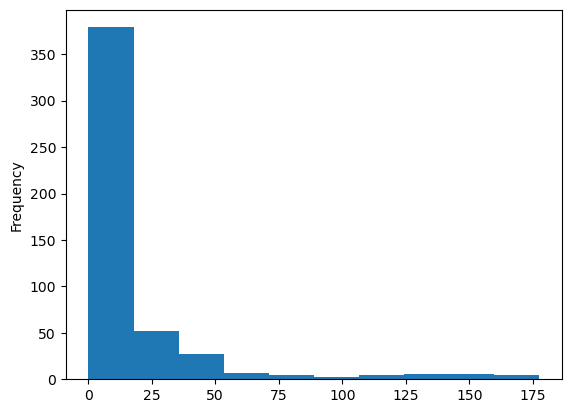

In [6]:
series.plot(kind='hist')

In [7]:
def style():
    plt.figure(facecolor='white',figsize=(15,10))
    ax = plt.axes()
    
    ax.tick_params(axis='x',color='white')
    ax.tick_params(axis='y',color='white')
    
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    
    ax.set_facecolor('white')

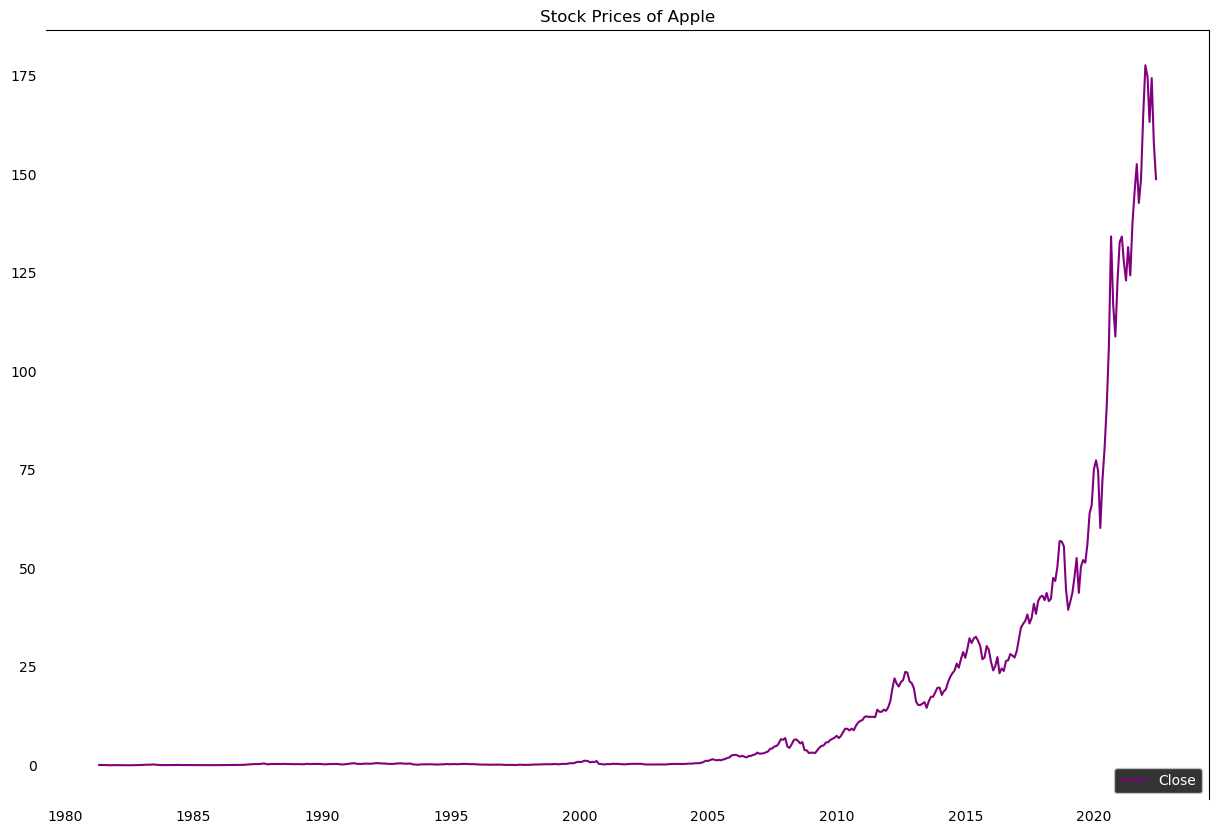

In [8]:
style()
plt.title('Stock Prices of Apple')
plt.plot(series,color='purple')
plt.legend(['Close'],loc='lower right',facecolor='black',labelcolor='white')

In [9]:
short_series = series.loc[(series.index < '2020-07-01')]
short_series.describe()

count    470.000000
mean       8.598324
std       15.433762
min        0.056362
25%        0.273437
50%        0.437143
75%        9.345000
max       80.462502
Name: Close, dtype: float64

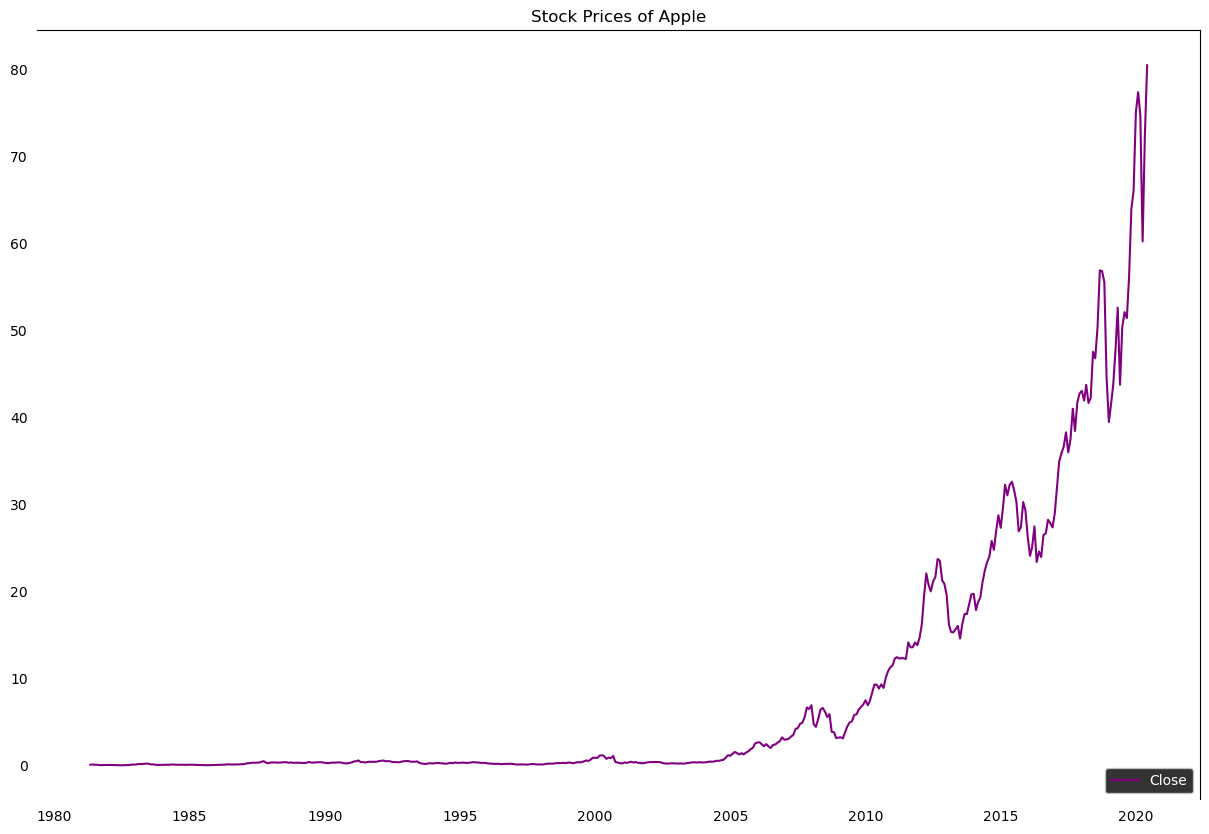

In [10]:
style()
plt.title('Stock Prices of Apple')
plt.plot(short_series,color='purple')
plt.legend(['Close'],loc='lower right',facecolor='black',labelcolor='white')

In [11]:
# short_series = short_series.rolling(window=3).mean().dropna()
# short_series.describe()

In [12]:
short_series.isna().sum()

0

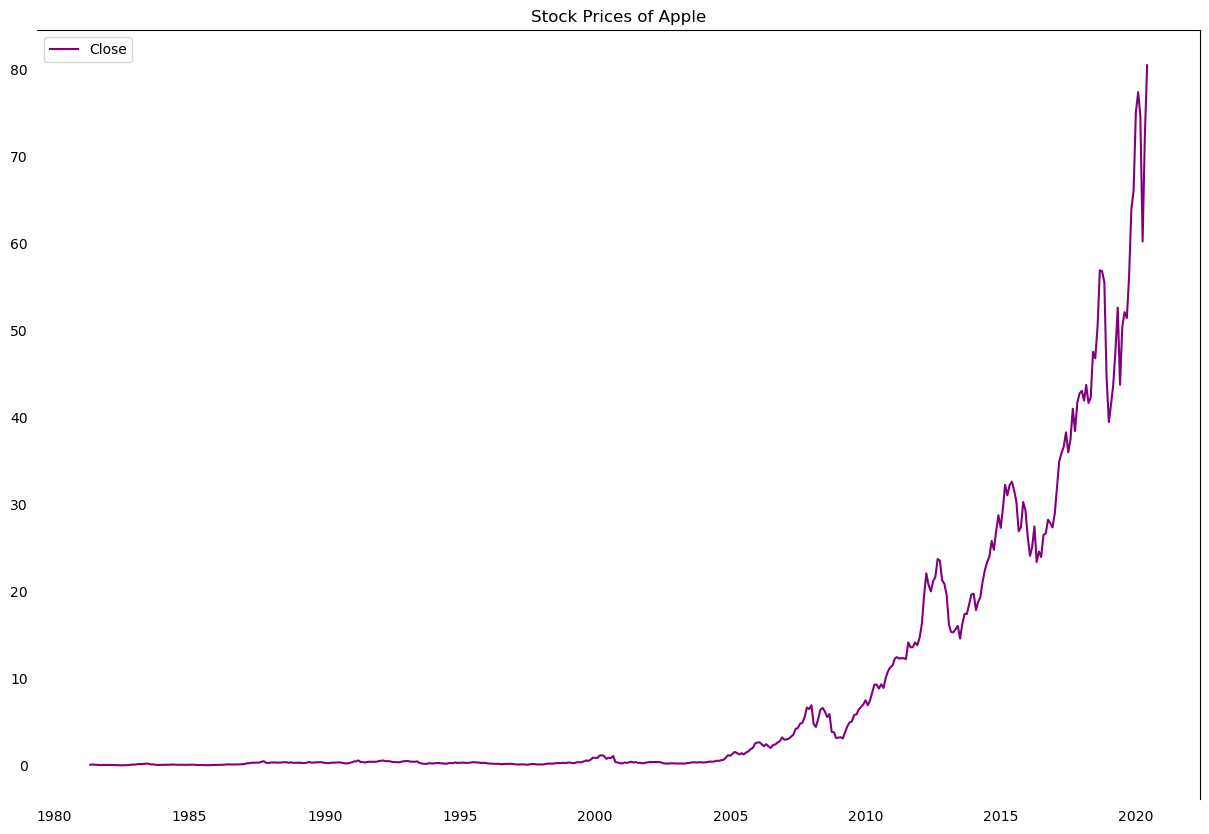

In [13]:
style()

plt.title('Stock Prices of Apple')
plt.plot(short_series,color='purple')
plt.legend(['Close'],loc='upper left',facecolor='white',labelcolor='black')

In [14]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# short_series['Close'] = scaler.fit_transform(short_series[['Close']])
short_series

1981-05-01     0.126674
1981-06-01     0.147879
1981-07-01     0.114955
1981-08-01     0.111607
1981-09-01     0.095424
                ...    
2020-02-01    77.377502
2020-03-01    74.702499
2020-04-01    60.227501
2020-05-01    72.267502
2020-06-01    80.462502
Freq: MS, Name: Close, Length: 470, dtype: float64

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
train, test = short_series.iloc[:456], short_series.iloc[456:]
model = ExponentialSmoothing(train,trend = "multiplicative", seasonal='mul', seasonal_periods=59).fit()
test

2019-05-01    52.630001
2019-06-01    43.767502
2019-07-01    50.387501
2019-08-01    52.107498
2019-09-01    51.424999
2019-10-01    56.147499
2019-11-01    63.955002
2019-12-01    66.040001
2020-01-01    75.087502
2020-02-01    77.377502
2020-03-01    74.702499
2020-04-01    60.227501
2020-05-01    72.267502
2020-06-01    80.462502
Freq: MS, Name: Close, dtype: float64

In [16]:
pred = model.predict(start=test.index[0], end=test.index[-1])
test.index[-1]

Timestamp('2020-06-01 00:00:00')

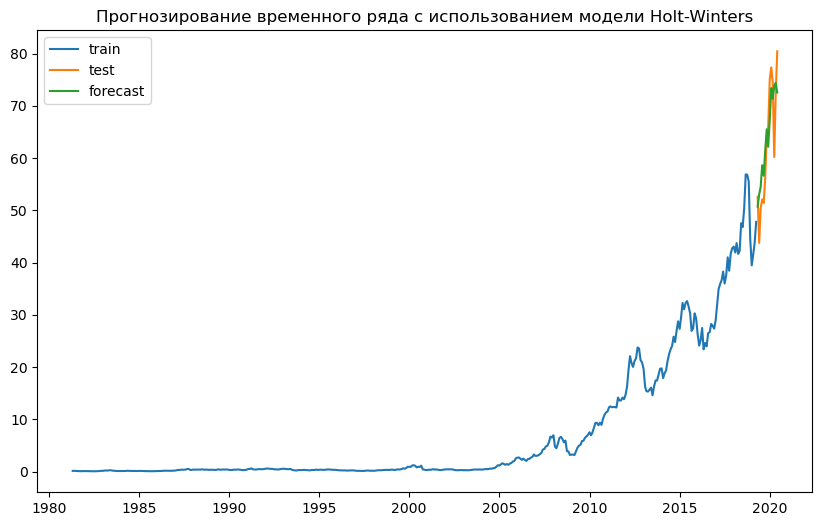

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(train, label='train')
plt.plot(test, label='test')
plt.plot(pred, label='forecast')
plt.legend(loc='best')
plt.title('Прогнозирование временного ряда с использованием модели Holt-Winters')
plt.show()

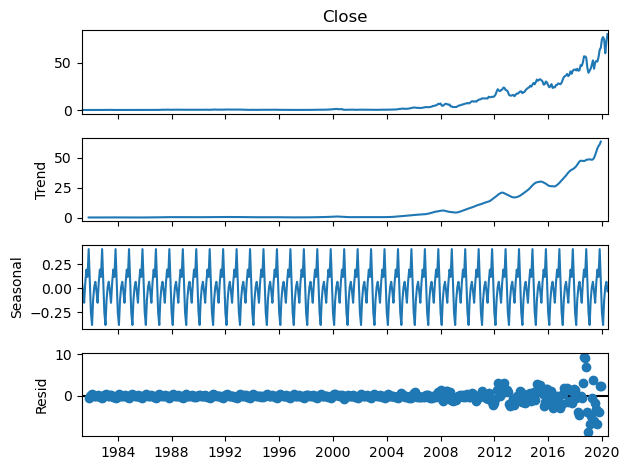

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
parts = seasonal_decompose(short_series, model="additive")
_ = parts.plot()

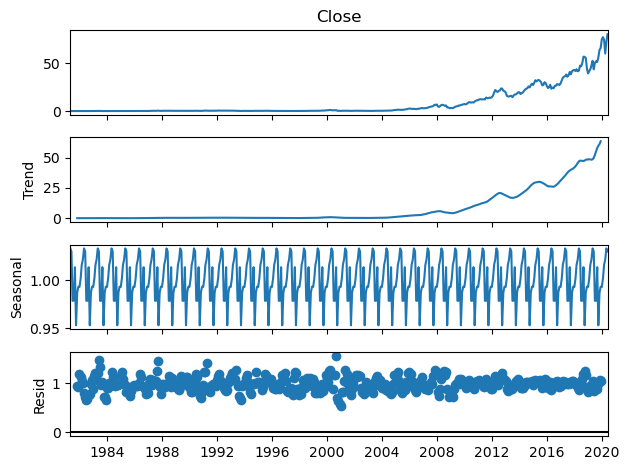

In [19]:
parts3 = seasonal_decompose(short_series, model="multiplicative")
_ = parts3.plot()

<Axes: >

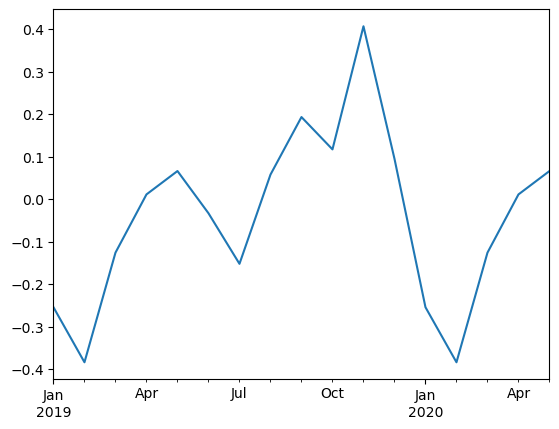

In [20]:
parts.seasonal['2019':'2020-05-01'].plot()

In [21]:
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error
mse = mean_squared_error(test, pred, squared = False)
mse

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


6.326064900531605

In [22]:
r2 = r2_score(test, pred)
r2

0.6942481821217579

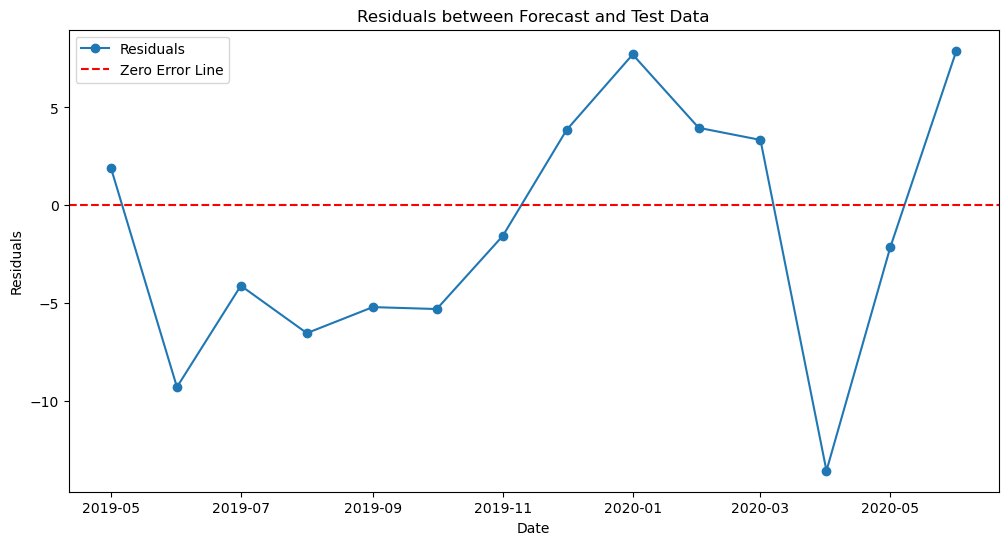

In [23]:

residuals = test - pred
plt.figure(figsize=(12, 6)) 
plt.plot(residuals, label='Residuals', marker='o') 
plt.axhline(y=0, color='r', linestyle='--', label='Zero Error Line') 
plt.xlabel('Date') 
plt.ylabel('Residuals') 
plt.title('Residuals between Forecast and Test Data') 
plt.legend()